In [76]:
import pandas as pd
import numpy 
import regex as re
import random
import sklearn


import scipy



In [77]:
pheno = pd.read_table("pheno.txt")
data = pd.read_table("normalized_data.txt")

pheno.head()


,ParticipantID,Phenotype,Sample_Source,PlateId,Sex,HybControlNormScale,RowCheck,NormScale_20,NormScale_0_005,NormScale_0_5,ANMLFractionUsed_20,ANMLFractionUsed_0_005,ANMLFractionUsed_0_5
0,C1,Control,Blood,P0023923,F,0.947480,PASS,0.769958,0.813128,0.818578,0.868,0.838,0.745
1,C2,Control,Blood,P0023895,F,0.891341,PASS,0.765640,0.967612,0.891220,0.874,0.900,0.790
2,C3,Control,Blood,P0023895,F,0.888196,PASS,0.412029,0.918688,0.810701,0.732,0.881,0.666
3,C4,Control,Blood,P0023923,F,0.856026,PASS,0.774548,0.866460,0.810048,0.879,0.875,0.777
4,C5,Control,Blood,P0023895,F,0.982222,PASS,0.665371,0.833492,0.820785,0.804,0.900,0.852


In [78]:
data.head()

metadata = data.iloc[:, :4]

metadata

,Molecule,Protein,Gene,UniProt
0,10000-28,CRBB2,CRYBB2,P43320
1,10001-7,c-Raf,RAF1,P04049
2,10003-15,ZNF41,ZNF41,P51814
3,10006-25,ELK1,ELK1,P19419
4,10008-43,GUC1A,GUCA1A,P43080
...,...,...,...,...
5279,9993-11,ZN264,ZNF264,O43296
5280,9994-217,ATP4B,ATP4B,P51164
5281,9995-6,DUT,DUT,P33316
5282,9997-12,UBXN4,UBXN4,Q92575


In [79]:
data = data.transpose()



In [80]:
data.columns = data.iloc[0]
data.drop(data.index[0:4], inplace=True)





In [81]:
data = data.apply(pd.to_numeric)

In [82]:
data.dtypes

Molecule
10000-28    float64
10001-7     float64
10003-15    float64
10006-25    float64
10008-43    float64
             ...   
9993-11     float64
9994-217    float64
9995-6      float64
9997-12     float64
9999-1      float64
Length: 5284, dtype: object

In [83]:
target = data.index.tolist()

#replace controls with 0 and patient with 1

target = [0 if re.search('[C]', x) else 1 for x in target ]


In [84]:
data["target"] = target
data['target']

C1     0
C2     0
C3     0
C4     0
C5     0
C8     0
C9     0
C11    0
C14    0
C15    0
C16    0
C17    0
C18    0
C19    0
C20    0
C21    0
C24    0
C25    0
C26    0
C27    0
P1     1
P2     1
P4     1
P6     1
P9     1
P11    1
P13    1
P17    1
P18    1
P19    1
P20    1
P21    1
P24    1
P25    1
P27    1
P28    1
P29    1
P30    1
P31    1
P32    1
Name: target, dtype: int64

## Feature Selection

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [86]:
X = data.drop(["target"],axis=1)
y = data['target']

#Using Pearson Correlation
#plt.figure()
cor = data.corr()


In [87]:
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

#Correlation with output variable
cor_target = abs(cor["target"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]


In [88]:
rel_data = data[[x for x in relevant_features.index]]
rel_data

Molecule,10440-26,11696-7,12800-5,13463-1,14008-22,14054-17,14131-37,16915-153,18819-21,18871-24,...,2615-60,2654-19,2944-66,3073-51,4374-45,5134-52,6375-75,7776-20,8483-5,target
C1,1012.6,10152.1,4794.6,1210.1,1006.0,7789.0,5362.8,11469.4,3487.7,1296.5,...,2922.8,13382.9,1181.7,4035.6,16061.5,2704.2,2197.5,8136.8,96.9,0
C2,870.8,8245.5,4726.7,970.7,1070.2,6609.3,4890.4,8125.7,6824.6,1330.0,...,2735.6,9179.1,1081.5,4357.8,11091.8,2488.9,1980.3,9561.3,107.2,0
C3,953.5,6604.4,2119.7,1105.6,791.1,3910.2,3518.1,11253.5,7253.6,996.2,...,1723.7,6556.5,1047.1,3326.8,7473.5,1791.7,1651.5,4944.6,118.8,0
C4,1075.5,7772.7,4769.7,1240.0,1002.7,7868.4,5953.9,10975.6,6196.9,1521.1,...,2924.8,12731.9,1066.6,5208.8,15619.9,3511.5,2047.3,8012.1,99.6,0
C5,1181.2,10094.5,4297.4,1232.1,1039.6,7901.5,5596.9,8758.8,7051.5,1461.0,...,2818.8,11596.8,1174.2,5338.6,12462.0,3565.5,2029.0,9353.2,103.0,0
C8,998.7,8086.3,4106.6,1175.8,1027.9,6392.8,5112.2,8576.8,7742.0,1356.8,...,2782.7,10338.4,1123.6,4355.2,12649.9,2729.3,2198.3,8744.2,125.9,0
C9,1105.4,8161.1,3687.1,1763.6,909.6,5981.2,6162.2,13312.2,8168.4,1410.4,...,2953.0,11457.2,1212.3,4593.6,14561.6,2887.0,2058.3,8128.1,112.1,0
C11,1092.0,6620.6,3173.5,1029.7,1011.7,7584.5,4616.8,11967.0,7676.9,1339.6,...,2751.3,9690.3,1208.4,3977.8,9395.5,2846.5,2229.1,8320.1,92.9,0
C14,1050.7,10211.3,4660.2,1236.4,1044.3,6115.0,6344.0,8130.5,6712.1,1350.9,...,2949.2,10917.2,1283.6,4135.3,11969.9,2664.3,2263.2,9317.4,107.9,0
C15,1056.7,9012.6,4125.1,1122.5,1238.2,7585.5,7002.7,10619.4,8205.1,1386.5,...,3554.6,11095.9,1354.8,4228.1,15890.3,2717.6,2585.7,10966.9,97.1,0


### Fitting GLM

In [89]:
cases = rel_data[rel_data["target"]==1]
controls = rel_data[rel_data["target"]!=1]


def simulate_protein_data(df):
    means = df.mean(axis=0).tolist()
    sds = df.std(axis=0).tolist()

    if len(means) != len(sds): ## sanity check
        return "List Imbalance"
    
    simulated_data = []
    for _ in range(1000):
        col = []
        for i in range(len(means)):
            col.append(random.gauss(means[i],sds[i]))
        simulated_data.append(col)
        

    simulated_dataframe = pd.DataFrame(simulated_data)
    return simulated_dataframe 




In [90]:
cases_simul = simulate_protein_data(cases)
control_simul = simulate_protein_data(controls)

In [91]:
#sanity check
import numpy as np
print(np.median(cases_simul.iloc[:,0]))
np.median(cases.iloc[:,0])

1235.0165252296442


1163.65

In [92]:
simul_data = pd.concat([cases_simul, control_simul])
simul_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1754.374234,11951.336659,5505.113247,2348.173195,1620.368796,10518.000097,6734.714459,8524.148422,10409.538861,2246.844284,...,3700.395860,13903.227670,1318.435746,4952.043753,19313.830310,3444.231633,2066.909197,7710.880383,99.256523,1.0
1,1309.529666,12983.206803,6891.131784,1262.343132,1074.772167,11229.715681,7571.086381,9513.925092,10791.292516,2033.671134,...,4018.507341,11926.567269,1665.241074,5360.429272,20007.075756,3701.329718,3362.529279,11316.414697,86.887464,1.0
2,1473.373893,14542.352713,7216.941953,2612.536235,1502.265938,8813.729558,8071.100901,8798.019192,10467.447215,1885.466818,...,3413.419637,10336.846150,1537.705530,5329.174985,16326.607627,3950.217838,2172.955477,10185.736405,89.825725,1.0
3,1122.362261,8591.427264,8786.664033,1187.075175,1484.821819,6742.901478,4983.897595,10224.221432,8245.020192,1566.157866,...,3985.906230,16651.667588,1204.291535,4150.187671,17871.796982,3633.593530,2675.856992,10728.818316,100.809896,1.0
4,1250.404959,15565.055722,4552.657202,2433.338657,1089.983530,10636.563666,8373.923999,9781.406582,9109.623481,1904.503990,...,4072.769374,12089.652194,1551.987784,3579.198860,12874.630183,3332.396044,2765.770550,11748.726299,99.829348,1.0


In [93]:
cases_simul.drop(21, axis=1, inplace=True)
cases_simul.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1754.374234,11951.336659,5505.113247,2348.173195,1620.368796,10518.000097,6734.714459,8524.148422,10409.538861,2246.844284,...,1166.109694,3700.395860,13903.227670,1318.435746,4952.043753,19313.830310,3444.231633,2066.909197,7710.880383,99.256523
1,1309.529666,12983.206803,6891.131784,1262.343132,1074.772167,11229.715681,7571.086381,9513.925092,10791.292516,2033.671134,...,1135.998906,4018.507341,11926.567269,1665.241074,5360.429272,20007.075756,3701.329718,3362.529279,11316.414697,86.887464
2,1473.373893,14542.352713,7216.941953,2612.536235,1502.265938,8813.729558,8071.100901,8798.019192,10467.447215,1885.466818,...,1114.241259,3413.419637,10336.846150,1537.705530,5329.174985,16326.607627,3950.217838,2172.955477,10185.736405,89.825725
3,1122.362261,8591.427264,8786.664033,1187.075175,1484.821819,6742.901478,4983.897595,10224.221432,8245.020192,1566.157866,...,893.171522,3985.906230,16651.667588,1204.291535,4150.187671,17871.796982,3633.593530,2675.856992,10728.818316,100.809896
4,1250.404959,15565.055722,4552.657202,2433.338657,1089.983530,10636.563666,8373.923999,9781.406582,9109.623481,1904.503990,...,1196.095614,4072.769374,12089.652194,1551.987784,3579.198860,12874.630183,3332.396044,2765.770550,11748.726299,99.829348


In [94]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data

pca = PCA(2)
 
#Transform the data
sdf = pca.fit_transform(cases_simul)
sdf.shape


(1000, 2)

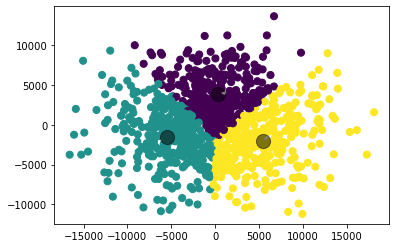

In [95]:
#from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(sdf)
y_kmeans = kmeans.predict(sdf)



plt.scatter(sdf[:, 0], sdf[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);



In [96]:
#assigning subtype to cases from Kmeans
cases_simul["subtype"] = y_kmeans
cases_simul.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,subtype
0,1754.374234,11951.336659,5505.113247,2348.173195,1620.368796,10518.000097,6734.714459,8524.148422,10409.538861,2246.844284,...,3700.395860,13903.227670,1318.435746,4952.043753,19313.830310,3444.231633,2066.909197,7710.880383,99.256523,0
1,1309.529666,12983.206803,6891.131784,1262.343132,1074.772167,11229.715681,7571.086381,9513.925092,10791.292516,2033.671134,...,4018.507341,11926.567269,1665.241074,5360.429272,20007.075756,3701.329718,3362.529279,11316.414697,86.887464,1
2,1473.373893,14542.352713,7216.941953,2612.536235,1502.265938,8813.729558,8071.100901,8798.019192,10467.447215,1885.466818,...,3413.419637,10336.846150,1537.705530,5329.174985,16326.607627,3950.217838,2172.955477,10185.736405,89.825725,2
3,1122.362261,8591.427264,8786.664033,1187.075175,1484.821819,6742.901478,4983.897595,10224.221432,8245.020192,1566.157866,...,3985.906230,16651.667588,1204.291535,4150.187671,17871.796982,3633.593530,2675.856992,10728.818316,100.809896,0
4,1250.404959,15565.055722,4552.657202,2433.338657,1089.983530,10636.563666,8373.923999,9781.406582,9109.623481,1904.503990,...,4072.769374,12089.652194,1551.987784,3579.198860,12874.630183,3332.396044,2765.770550,11748.726299,99.829348,2


## KNN Time


In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(cases_simul.drop("subtype", axis=1), cases_simul['subtype'], random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

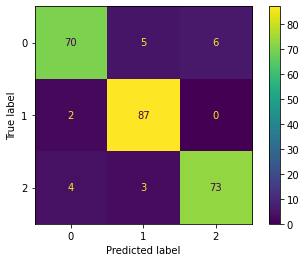

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()